In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [16]:
survey_df = pd.read_csv('data/Survey-Data/survey_031023_1344.csv')

pilot_df = survey_df[survey_df["StartDate"] < "4/22/23 10:35"]
main_df = survey_df[survey_df["StartDate"] >= "4/22/23 10:35"]
print(len(pilot_df.index))
print(len(main_df.index))

21
44


In [3]:
correct_answers = [4, 1, 2, 2, 2, 1, 3, 1, 2, 1, 1, 1]
similarity_type = ['orthographic', 'orthographic', 'orthographic', 'orthographic',
                   'phonological', 'phonological', 'phonological', 'phonological',
                   'semantic', 'semantic', 'semantic', 'semantic']

In [20]:
scored_df_pilot = pd.DataFrame()
scored_df_pilot['years_experience'] = pilot_df['years_experience_1']
scored_df_pilot['python_experience'] = pilot_df['years_experience_2']
scored_df_pilot['course_level'] = pilot_df['course_level_1']

scored_df_main = pd.DataFrame()
scored_df_main['years_experience'] = main_df['years_experience_1']
scored_df_main['python_experience'] = main_df['years_experience_2']
scored_df_main['course_level'] = main_df['course_level_1']

Q_df_pilot = pd.DataFrame()
Q_df_pilot['type'] = similarity_type
Q_df_main = pd.DataFrame()
Q_df_main['type'] = similarity_type

for dataframe, source, length, scdf in [(Q_df_pilot, pilot_df, 21, scored_df_pilot), (Q_df_main, main_df, 44, scored_df_main)]:
    dif_percent = []
    sim_percent = []
    dif_attempts = []
    sim_attempts = []

    for i in range(12):

        # create strings for column names
        similar_header = 'Q' + str(i + 1) + '_similar'
        different_header = 'Q' + str(i + 1) + '_different'

        # get the corresponding column and turn into a np array
        dif_data = np.array(source[different_header])
        sim_data = np.array(source[similar_header])

        # get a binary list of correct/incorrect answers
        dif_scored = np.asarray([dif_data[j]==correct_answers[i] if not np.isnan(dif_data[j]) else np.nan for j in range(length)], dtype=float)
        sim_scored = np.asarray([sim_data[j]==correct_answers[i] if not np.isnan(sim_data[j]) else np.nan for j in range(length)], dtype=float)

        # add the binary list to scored_df as a column
        scdf[different_header] = dif_scored
        scdf[similar_header] = sim_scored

        # add the average of each binary list and the frequency of the question to the lists
        dif_percent.append(scdf[different_header].sum()/scdf[different_header].count())
        sim_percent.append(scdf[similar_header].sum()/scdf[similar_header].count())
        dif_attempts.append(scdf[different_header].count())
        sim_attempts.append(scdf[similar_header].count())

    dataframe['score_different'] = dif_percent
    dataframe['n_different'] = dif_attempts
    dataframe['score_similar'] = sim_percent
    dataframe['n_similar'] = sim_attempts

# scored_df.to_csv('data/Survey-Data/scored-survey-051023.csv')

In [23]:
print(Q_df_pilot)
print(Q_df_main)
scored_df_pilot.to_csv('data/Survey-Data/scored_pilot.csv')
scored_df_main.to_csv('data/Survey-Data/scored_main.csv')

            type  score_different  n_different  score_similar  n_similar
0   orthographic         0.600000            5       0.000000          2
1   orthographic         0.500000            4       1.000000          3
2   orthographic         0.600000            5       0.000000          1
3   orthographic         0.500000            4       0.000000          2
4   phonological         0.000000            1       0.000000          3
5   phonological         0.600000            5       0.666667          3
6   phonological         0.500000            4       0.000000          2
7   phonological         0.666667            3       0.833333          6
8       semantic         0.500000            2       1.000000          5
9       semantic         1.000000            3       1.000000          3
10      semantic         0.750000            4       1.000000          3
11      semantic         0.166667            6       0.333333          3
            type  score_different  n_different  sco

In [13]:
print(Q_df[Q_df['type'] == 'orthographic']['score_different'].mean())

0.553030303030303


In [19]:
# Q_df.to_csv("processed_data_051023.csv")

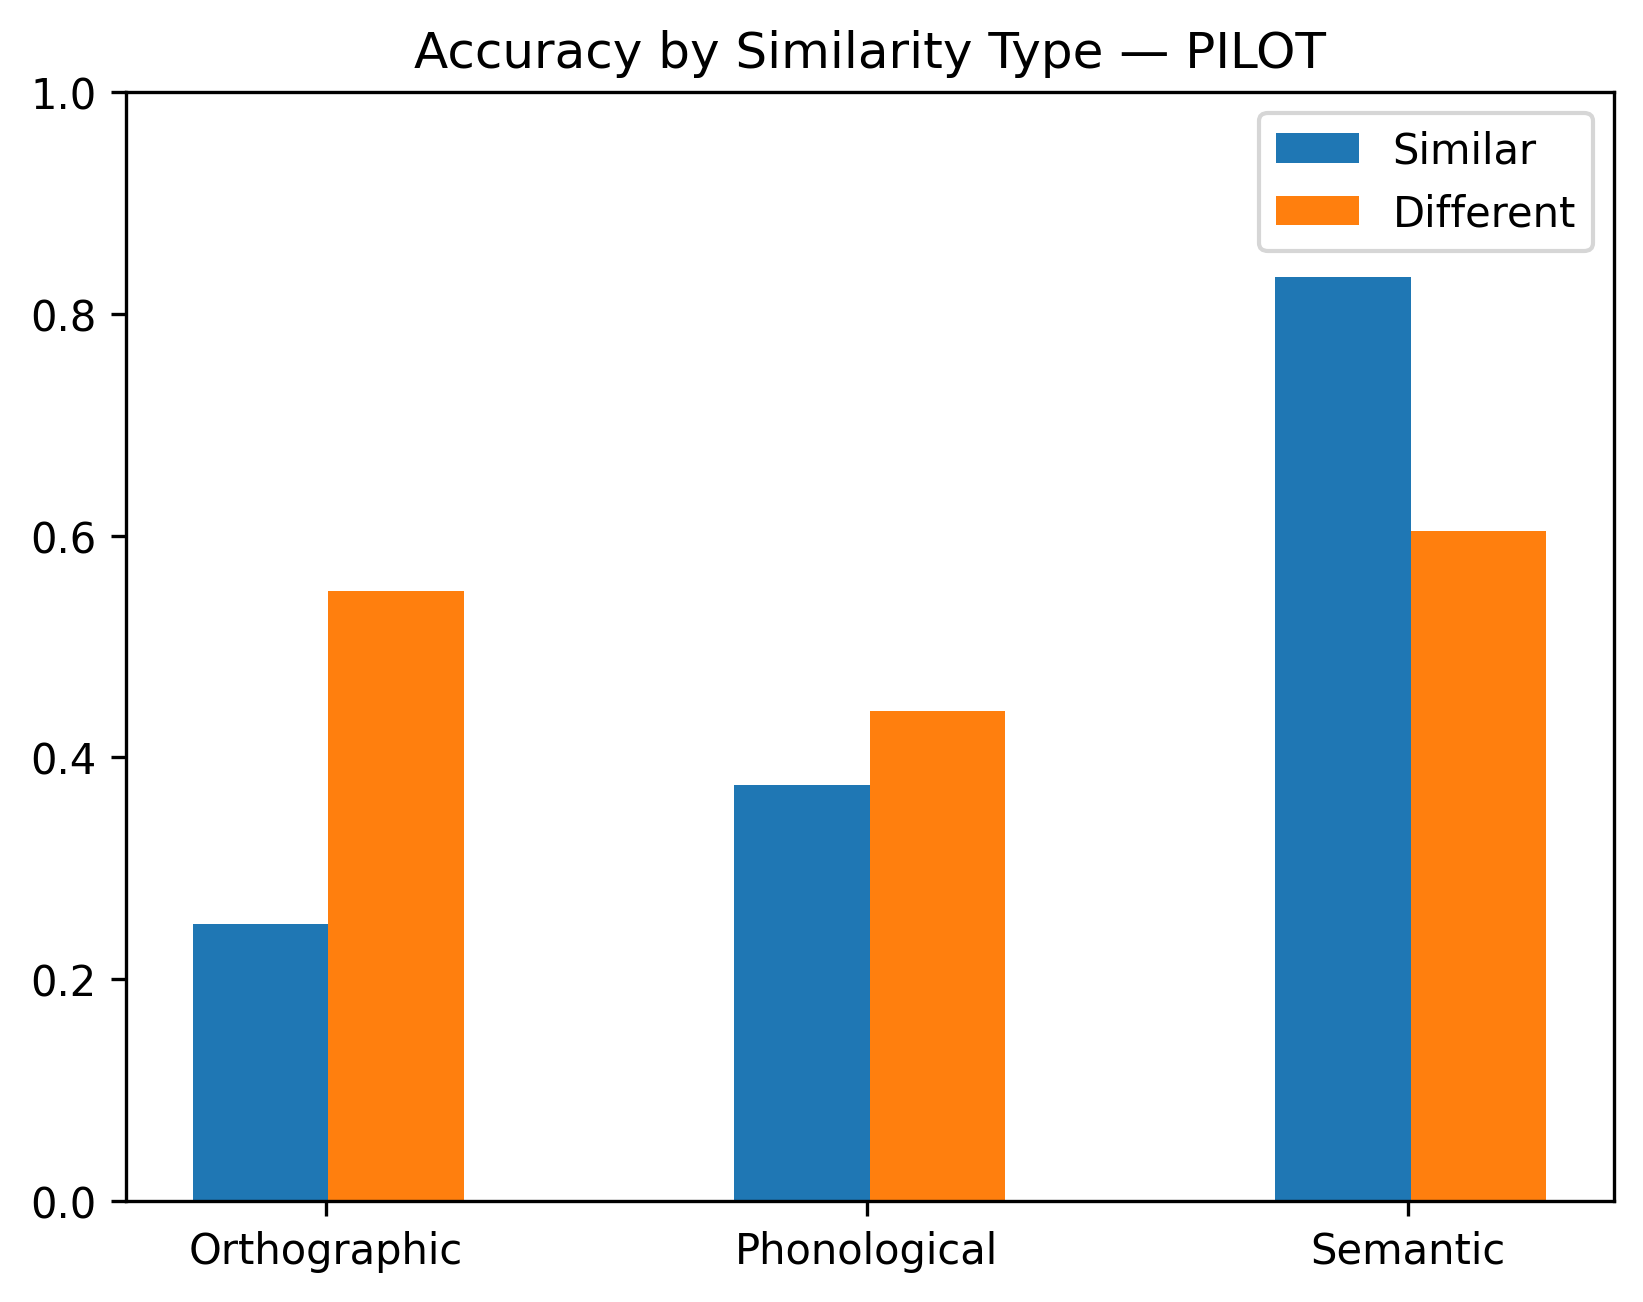

In [24]:
fig, ax = plt.subplots(dpi=300)

count = 0
width = 0.25
x = np.array([0, 1, 2])

means = {'similar': [],
         'different': []}

for version in ('similar', 'different'):
    for sim_type in ('orthographic', 'phonological', 'semantic'):
        score = Q_df_pilot[Q_df_pilot['type'] == sim_type]['score_' + version].mean()
        means[version].append(score)

for sim_type, data in means.items():
    offset = width*count + 0.13
    ax.bar(x + offset, data, width, label=sim_type.capitalize())\
    
    count += 1

ax.set_xticks(x + width, ('Orthographic', 'Phonological', 'Semantic'))
ax.set_ylim(0, 1)

ax.set_title('Accuracy by Similarity Type — PILOT')

fig.legend(bbox_to_anchor=(0.9, 0.88))
plt.show()

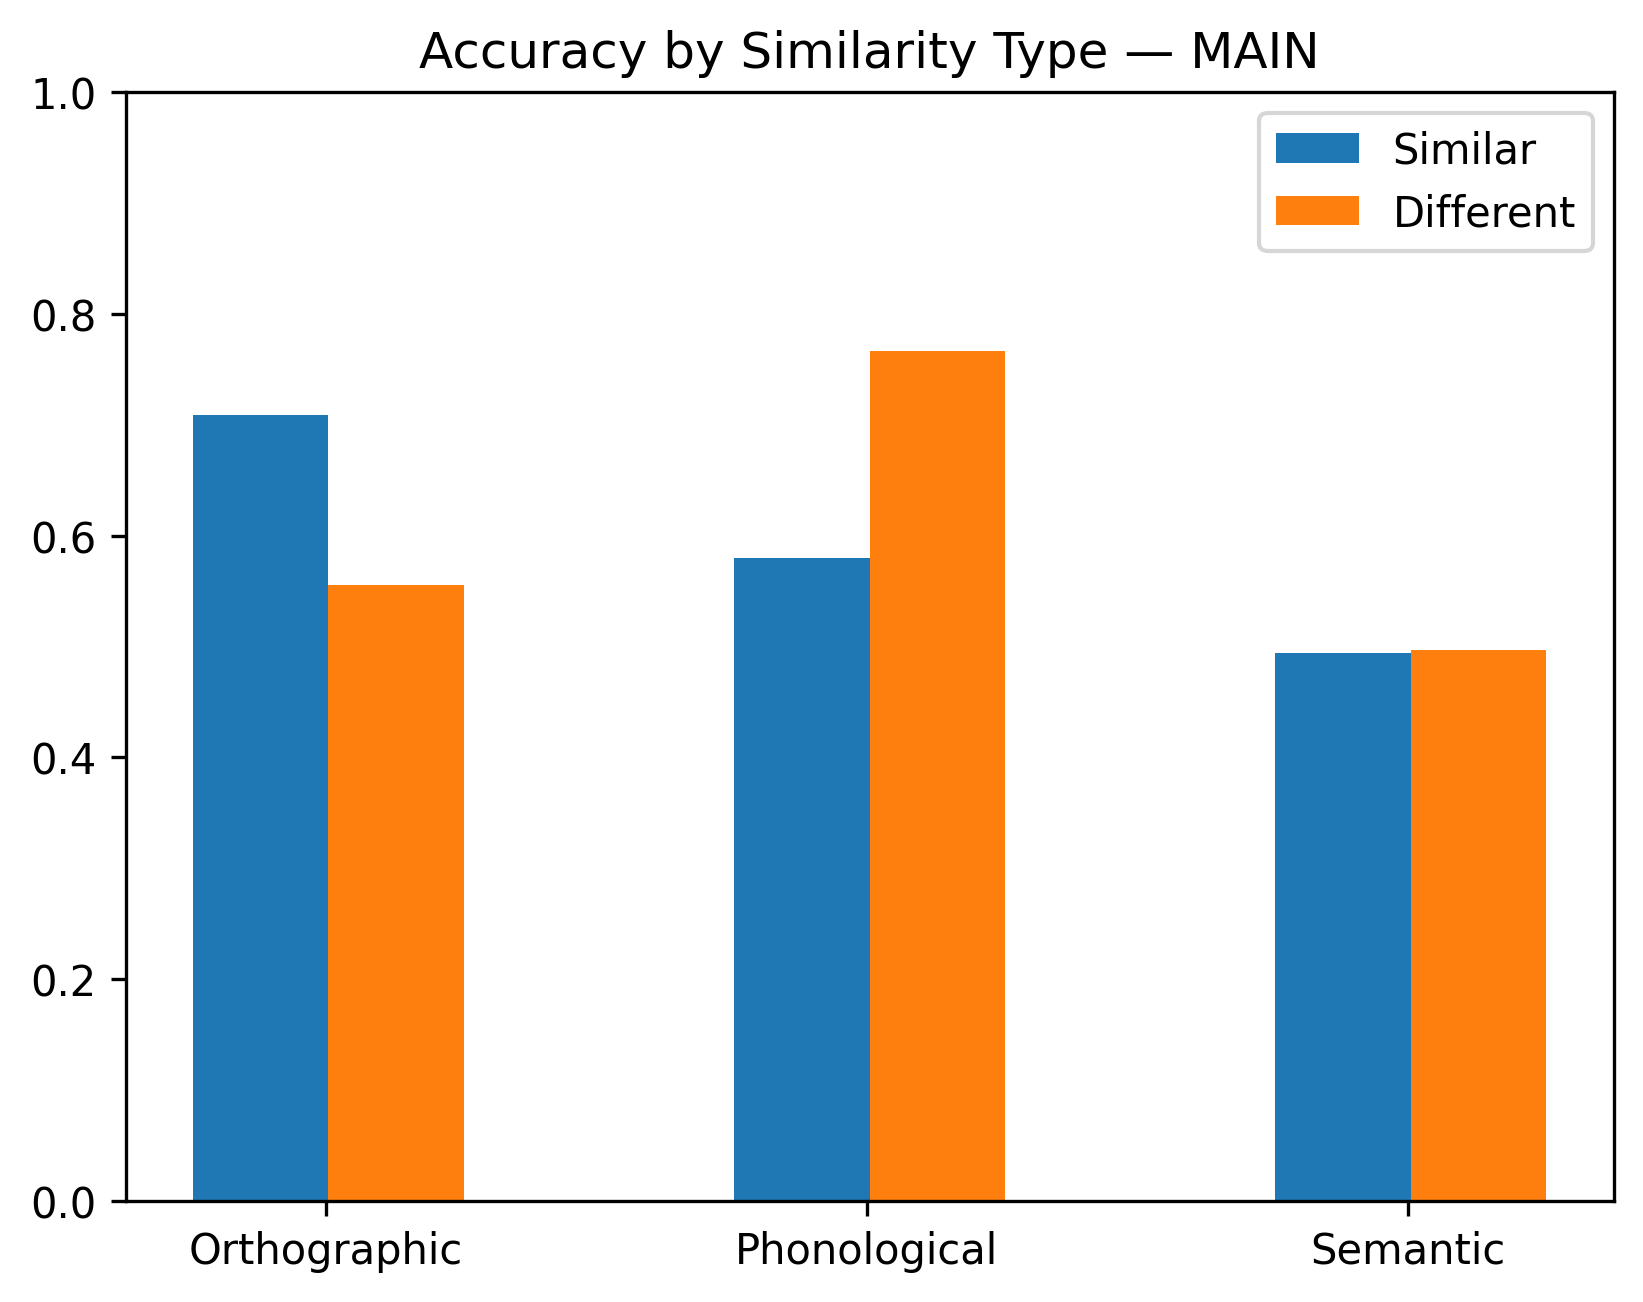

In [25]:
fig, ax = plt.subplots(dpi=300)

count = 0
width = 0.25
x = np.array([0, 1, 2])

means = {'similar': [],
         'different': []}

for version in ('similar', 'different'):
    for sim_type in ('orthographic', 'phonological', 'semantic'):
        score = Q_df_main[Q_df_main['type'] == sim_type]['score_' + version].mean()
        means[version].append(score)

for sim_type, data in means.items():
    offset = width*count + 0.13
    ax.bar(x + offset, data, width, label=sim_type.capitalize())\
    
    count += 1

ax.set_xticks(x + width, ('Orthographic', 'Phonological', 'Semantic'))
ax.set_ylim(0, 1)

ax.set_title('Accuracy by Similarity Type — MAIN')

fig.legend(bbox_to_anchor=(0.9, 0.88))
plt.show()

/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_53026/702798567.py:4: RuntimeWarning: invalid value encountered in double_scalars
  scores.append(scored_df_pilot.iloc[r, 3::].sum()/scored_df_pilot.iloc[r, 3::].count())


r^2: nan, p: nan


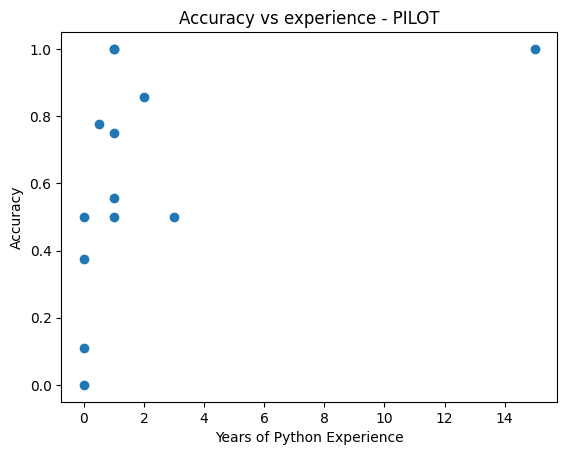

In [29]:
scores = []

for r in range(21):
    scores.append(scored_df_pilot.iloc[r, 3::].sum()/scored_df_pilot.iloc[r, 3::].count())

fig, ax = plt.subplots()
ax.scatter(scored_df_pilot['python_experience'], scores)

lr = stats.linregress(scored_df_pilot['python_experience'], scores)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')
plt.title("Accuracy vs experience - PILOT")

plt.show()

r^2: nan, p: nan


/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_53026/3040855304.py:4: RuntimeWarning: invalid value encountered in double_scalars
  scores.append(scored_df_main.iloc[r, 3::].sum()/scored_df_main.iloc[r, 3::].count())


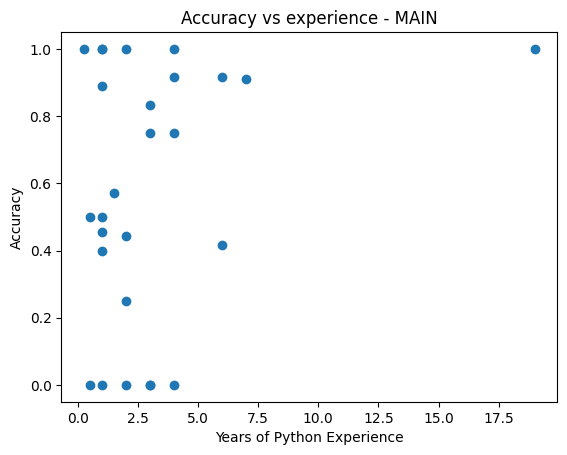

In [30]:
scores = []

for r in range(44):
    scores.append(scored_df_main.iloc[r, 3::].sum()/scored_df_main.iloc[r, 3::].count())

fig, ax = plt.subplots()
ax.scatter(scored_df_main['python_experience'], scores)

lr = stats.linregress(scored_df_main['python_experience'], scores)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')
plt.title("Accuracy vs experience - MAIN")

plt.show()

(13, 27) 13
r^2: nan, p: nan


/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_53026/591440040.py:9: RuntimeWarning: invalid value encountered in double_scalars
  no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


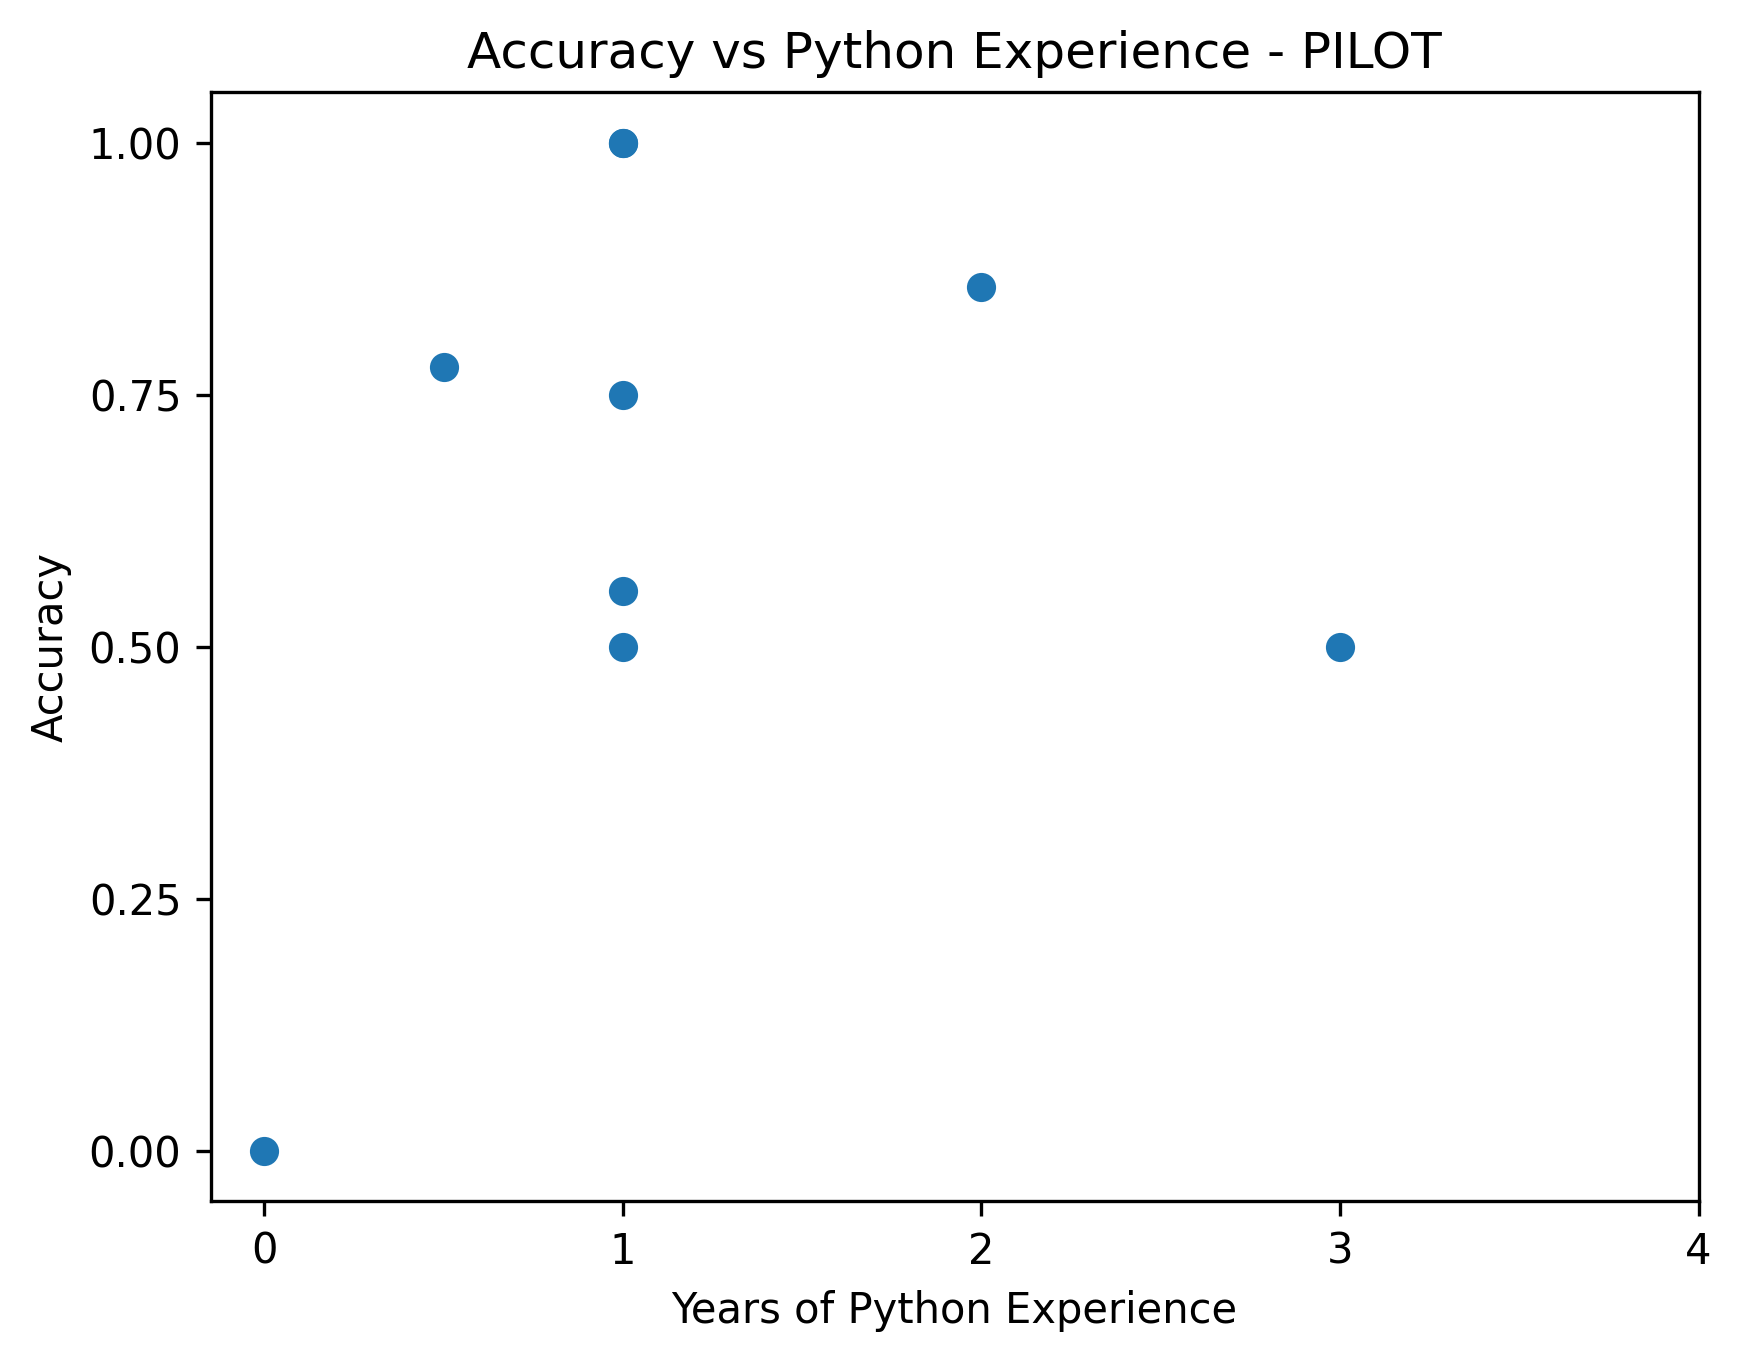

In [32]:
no_outlier = scored_df_pilot[scored_df_pilot['years_experience'] < 6]
no_outlier = no_outlier[no_outlier['years_experience'] > 0]

print(no_outlier.shape, len(no_outlier))

no_outlier_scores = []

for r in range(len(no_outlier)):
    no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


fig, ax = plt.subplots(dpi=300)
ax.scatter(no_outlier['python_experience'], no_outlier_scores)

lr = scipy.stats.linregress(no_outlier['python_experience'], no_outlier_scores)

x = np.linspace(0, 4, 10)
y = lr.slope*x + lr.intercept

plt.plot(x, y)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_title('Accuracy vs Python Experience - PILOT')

plt.show()

(32, 27) 32
r^2: nan, p: nan


/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_53026/1888671336.py:9: RuntimeWarning: invalid value encountered in double_scalars
  no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


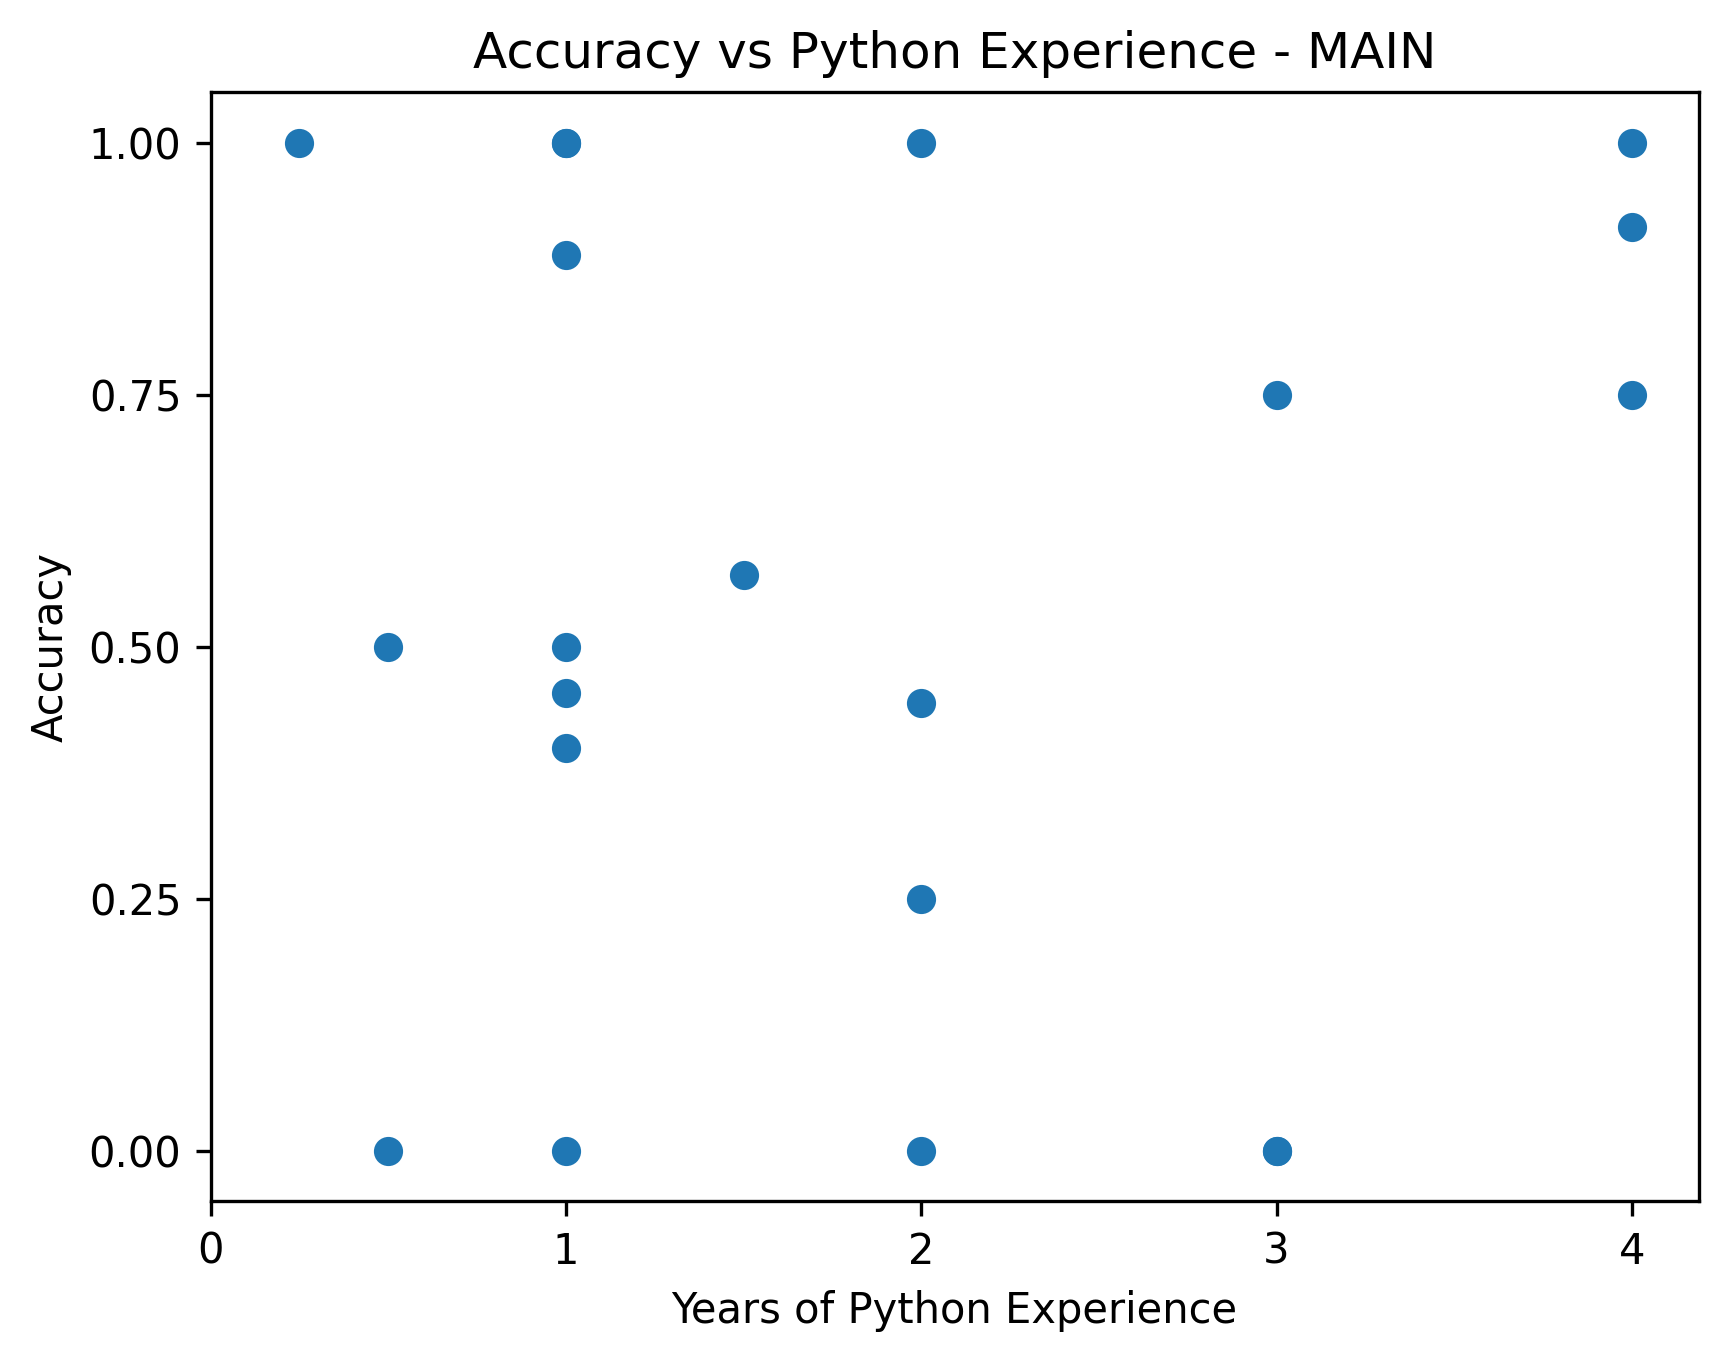

In [33]:
no_outlier = scored_df_main[scored_df_main['years_experience'] < 6]
no_outlier = no_outlier[no_outlier['years_experience'] > 0]

print(no_outlier.shape, len(no_outlier))

no_outlier_scores = []

for r in range(len(no_outlier)):
    no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


fig, ax = plt.subplots(dpi=300)
ax.scatter(no_outlier['python_experience'], no_outlier_scores)

lr = scipy.stats.linregress(no_outlier['python_experience'], no_outlier_scores)

x = np.linspace(0, 4, 10)
y = lr.slope*x + lr.intercept

plt.plot(x, y)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_title('Accuracy vs Python Experience - MAIN')

plt.show()